In [898]:
import pandas as pd
dataset = pd.read_csv('./Titanic Dataset.csv')
dataset.head()
dataset_overall=dataset['survived']

In [899]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [900]:
dataset.describe(include='O')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [901]:
dataset.survived.unique()

array([1, 0])

In [902]:
dataset['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

1)Distribution of age and fare....

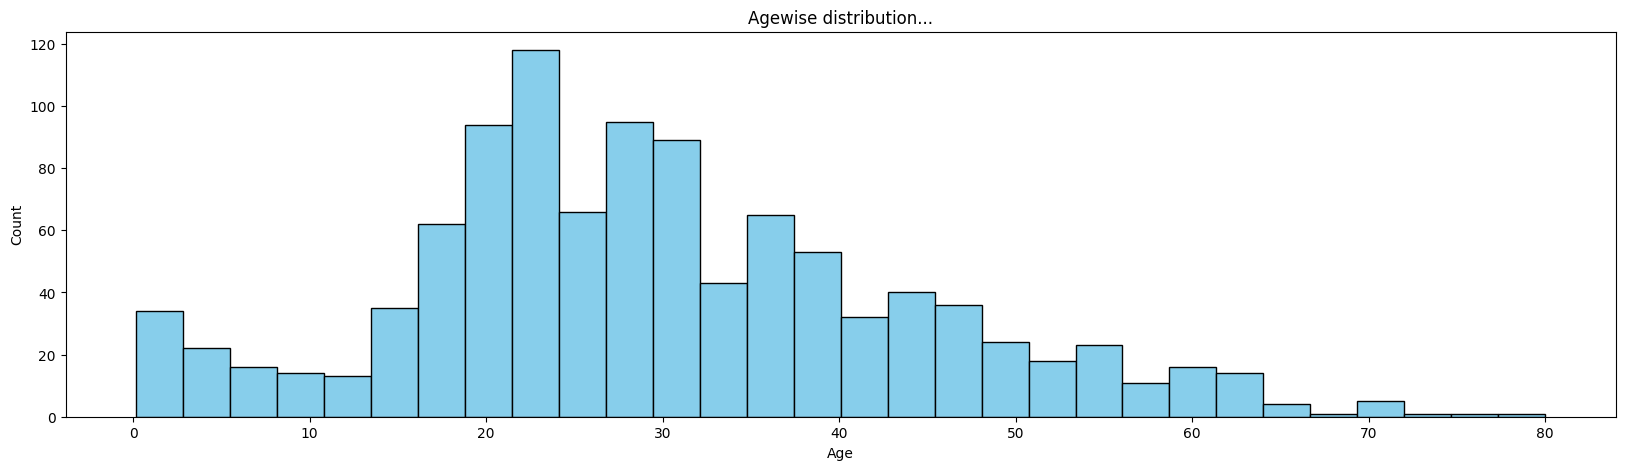

In [903]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for the histogram

plt.figure(figsize=(20, 5))
# Plotting a basic histogram
plt.hist(dataset.age.dropna(), bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Agewise distribution...')

# Display the plot
plt.show()

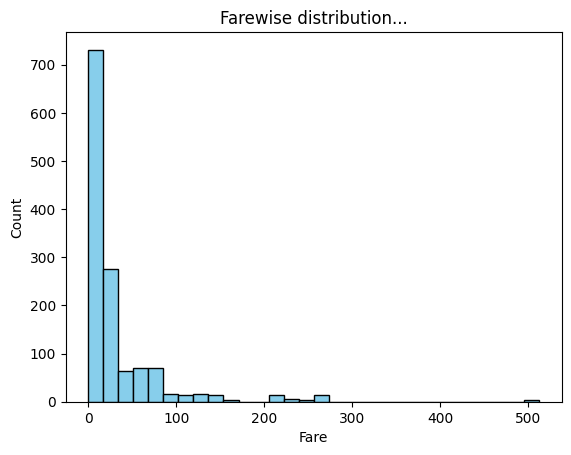

In [904]:
# Plotting a basic histogram
plt.hist(dataset.fare.dropna(), bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Farewise distribution...')

# Display the plot
plt.show()

3.Data cleaning...
**3. Data Cleaning & Preprocessing**

  * 3.1 Handling Missing Values
      * Analysis of Missing Data (`Age`, `Cabin`, `Embarked`, `Fare`)
      * Imputation Strategies:
          * Mean/Median Imputation for `Age` and `Fare`
          * Mode Imputation for `Embarked`
      * Handling High-Missing Columns: Strategies for `Cabin` (Drop vs. Feature Extraction)
  * 3.2 Dropping Irrelevant Features
      * Removing unique identifiers (`Ticket`, `PassengerId`)
      * Handling Data Leakage features (`Boat`, `Body`)
  * 3.3 Outlier Detection and Handling
      * Boxplots for `Fare` and `Age`

In [905]:
dataset=dataset.copy()
dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [906]:
age_mean=dataset.age.mean()

dataset['age']=dataset['age'].fillna(age_mean)
fare_mean=dataset.fare.mean()

dataset['fare']=dataset['fare'].fillna(fare_mean)

embarked_mode=dataset.embarked.mode()

dataset['embarked']=dataset['embarked'].fillna(embarked_mode)

In [907]:
dataset.drop(columns=['ticket','boat','body','home.dest'],inplace=True)

In [908]:
dataset

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.2250,NaN,C


Remove outlier from fare and age column...

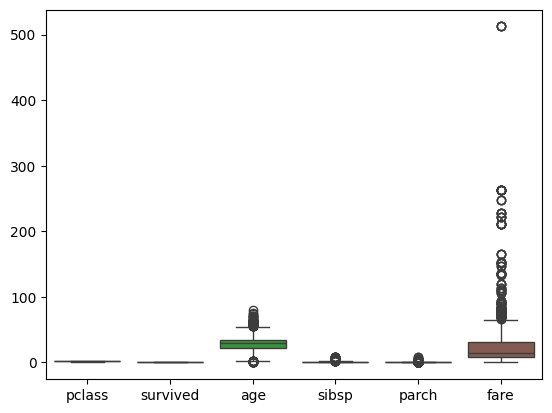

In [909]:
import seaborn as sns
import matplotlib.pyplot as plt

df = dataset
sns.boxplot( data=df)
plt.show()

In [910]:
dataset = dataset[dataset['age'] >= 50]
dataset = dataset[dataset['fare'] >= 60]

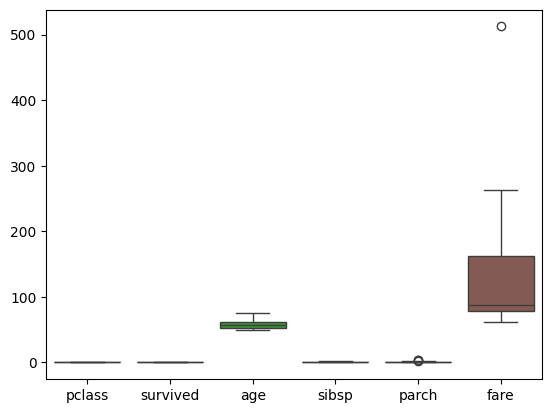

In [911]:

df = dataset
sns.boxplot( data=dataset)
plt.show()

**4. Feature Engineering**

  * 4.1 Creating New Features
      * **Family Size**: Combining `SibSp` (Siblings/Spouses) and `Parch` (Parents/Children)
      * **IsAlone**: Binary feature indicating if a passenger is travelling alone
      * **Title Extraction**: Parsing `Name` to extract titles (Mr., Mrs., Miss., Master, etc.)
  * 4.2 Feature Transformation
      * **Binning**: converting continuous variables into categorical bins
          * Creating Age Groups (e.g., Child, Adult, Senior)
          * Creating Fare Ranges (Quartiles)
  * 4.3 Encoding Categorical Variables
      * One-Hot Encoding (for nominal data like `Sex`, `Embarked`, `Title`)
      * Label/Ordinal Encoding (for ordinal data like `Pclass`)

In [912]:
dataset=dataset.copy()
dataset['age2'] = pd.cut(dataset.age, bins=4, 
                      labels=['child','adult','senior','older'])
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,age2
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,D7,S,adult
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,B58 B60,C,child
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,76.2917,D15,C,adult
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C,adult
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,78.8500,C46,S,older


In [913]:
dataset['fare2'] = pd.qcut(df.fare, q=4
                        )
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,age2,fare2
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,D7,S,adult,"(61.378, 78.267]"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,B58 B60,C,child,"(162.016, 512.329]"
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,76.2917,D15,C,adult,"(61.378, 78.267]"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C,adult,"(162.016, 512.329]"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,78.8500,C46,S,older,"(78.267, 88.329]"


In [914]:
dataset.age2.value_counts()

age2
child     17
adult     14
senior     5
older      2
Name: count, dtype: int64

In [915]:
dataset.fare2.value_counts()    


fare2
(61.378, 78.267]      11
(162.016, 512.329]    10
(88.329, 162.016]      9
(78.267, 88.329]       8
Name: count, dtype: int64

In [916]:
dataset['Title']=dataset.name.str.extract('([A-Za-z]+)\.',expand=False)

In [917]:
dataset.name

6                      Andrews, Miss. Kornelia Theodosia
17       Baxter, Mrs. James (Helene DeLaudeniere Chaput)
43       Bucknell, Mrs. William Robert (Emma Eliza Ward)
50     Cardeza, Mrs. James Warburton Martinez (Charlo...
61     Cavendish, Mrs. Tyrell William (Julia Florence...
78     Compton, Mrs. Alexander Taylor (Mary Eliza Ing...
81                          Crosby, Capt. Edward Gifford
93                                 Dodge, Dr. Washington
95                 Dodge, Mrs. Washington (Ruth Vidaver)
96                            Douglas, Mr. Walter Donald
104                       Eustis, Miss. Elizabeth Mussey
115                                    Fortune, Mr. Mark
116                  Fortune, Mrs. Mark (Mary McDougald)
119                        Frauenthal, Dr. Henry William
123                     Frolicher-Stehli, Mr. Maxmillian
139        Graham, Mrs. William Thompson (Edith Junkins)
154                           Hays, Mr. Charles Melville
155    Hays, Mrs. Charles Melvi

In [918]:
dataset

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,age2,fare2,Title
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,D7,S,adult,"(61.378, 78.267]",Miss
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,B58 B60,C,child,"(162.016, 512.329]",Mrs
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,76.2917,D15,C,adult,"(61.378, 78.267]",Mrs
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C,adult,"(162.016, 512.329]",Mrs
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,78.8500,C46,S,older,"(78.267, 88.329]",Mrs
78,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,83.1583,E45,C,senior,"(78.267, 88.329]",Mrs
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0000,B22,S,older,"(61.378, 78.267]",Capt
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,81.8583,A34,S,child,"(78.267, 88.329]",Dr
95,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,81.8583,A34,S,child,"(78.267, 88.329]",Mrs
96,1,0,"Douglas, Mr. Walter Donald",male,50.0,1,0,106.4250,C86,C,child,"(88.329, 162.016]",Mr


In [919]:
dataset['family_size'] = dataset['sibsp'] + dataset['parch'] +1 
dataset['isAlone'] = (dataset['family_size'] == 1).astype(int)

In [920]:
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,age2,fare2,Title,family_size,isAlone
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,D7,S,adult,"(61.378, 78.267]",Miss,2,0
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,B58 B60,C,child,"(162.016, 512.329]",Mrs,2,0
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,76.2917,D15,C,adult,"(61.378, 78.267]",Mrs,1,1
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C,adult,"(162.016, 512.329]",Mrs,2,0
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,78.8500,C46,S,older,"(78.267, 88.329]",Mrs,2,0


In [921]:
df=dataset.copy()
df = dataset.drop(['age2', 'fare2'], axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,Title,family_size,isAlone
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,D7,S,Miss,2,0
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,B58 B60,C,Mrs,2,0
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,76.2917,D15,C,Mrs,1,1
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C,Mrs,2,0
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,78.8500,C46,S,Mrs,2,0


In [922]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Load dataset






# Define numerical and categorical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Define transformers
num_transformer = StandardScaler()  # Standardization for numerical features
cat_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encoding for categorical features
if 'survived' in num_features:
    num_features.remove('survived')
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [923]:
# num_features

In [924]:
# cat_features

In [925]:
# Define target and features
X = df.drop(columns=['survived'],axis=1)
y = df['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the data
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (30, 12)
Testing set shape: (8, 12)


In [926]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data transformation
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # ML model
])

# Train the model
pipeline.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [927]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.88


In [928]:
# import joblib

# # Save the trained pipeline
# joblib.dump(pipeline, 'ml_pipeline.pkl')

# # Load the model
# loaded_pipeline = joblib.load('ml_pipeline.pkl')

# # Predict using the loaded model
# sample_data = pd.DataFrame([{'Pclass': 3, 'Sex': 'male', 'Age': 25, 'SibSp': 0, 'Parch': 0, 'Fare': 7.5, 'Embarked': 'S'}])
# prediction = loaded_pipeline.predict(sample_data)
# print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Did not Survive'}")